# Exploratory Analysis

---

## Univariada Temporal

- Distribuição de acidentes por ano
- Distribuição mensal e identificação de padrões sazonais
- Distribuição por dia da semana
- Distribuição por horário
- Distribuição por estação do ano

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
import sys
sys.path.append("../")

# Importando funções do módulo próprio
from src.visualization import plot_bar_from_column

sns.set_theme()

Observação:

- A função ``plot_bar_from_column`` foi importada do módulo [visualization.py](../src/visualization.py)
- Localizado na pasta [src](../src/).

In [2]:
df = pd.read_csv("../data/processed/NYC_Collisions_Processed.csv")
df.head()

,Collision ID,Date,Time,Borough,Street Name,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,...,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Year,Month,Month Name,Day of week,Day,Season
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,40.68730,-73.973656,Unspecified,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,Fell Asleep,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,40.88270,-73.892730,Unknown,Not Reported,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,40.63791,-73.978640,Unspecified,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter


### Year (Ano)

In [3]:
print(pd.DataFrame({"Frequence": df["Year"].value_counts(),
              "Percent(%)": round(df["Year"]
              .value_counts(normalize=True)*100, 2)}))

      Frequence  Percent(%)
Year                       
2021     107396       46.45
2022     100427       43.43
2023      23400       10.12


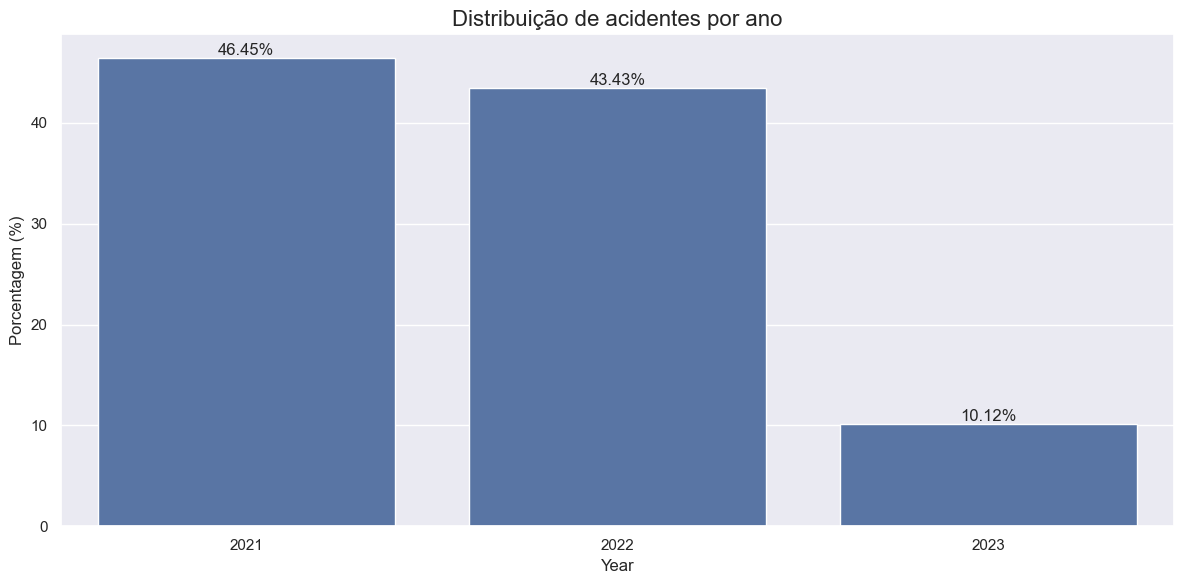

In [4]:
plot_bar_from_column(df=df,
                     column="Year",
                     title="Distribuição de acidentes por ano",
                     percent=True,
                     save_path="../visualizations/exploratory/distribuicao_por_ano.png")

Este gráfico mostra quantos acidentes ocorreram em cada ano. Em 2021, foram 46.45% dos acidentes. Em 2022, o número caiu um pouco, para 43.43%. Já em 2023, o número registrado foi bem menor: 10.12%. Essa grande diferença em 2023 significa que os dados daquele ano ainda não estão completos, cobrindo apenas uma parte do período, e não necessariamente que os acidentes diminuíram tanto assim.

### Month (Mês)

In [5]:
month = pd.DataFrame({"Frequence": df["Month"].value_counts(),
                      "Percent(%)": round(df["Month"]
                      .value_counts(normalize=True)*100, 2)})

month

,Frequence,Percent(%)
Month,,
3,24330,10.52
1,22403,9.69
2,20643,8.93
6,19461,8.42
5,19076,8.25
10,18675,8.08
4,18542,8.02
7,18280,7.91
8,18219,7.88


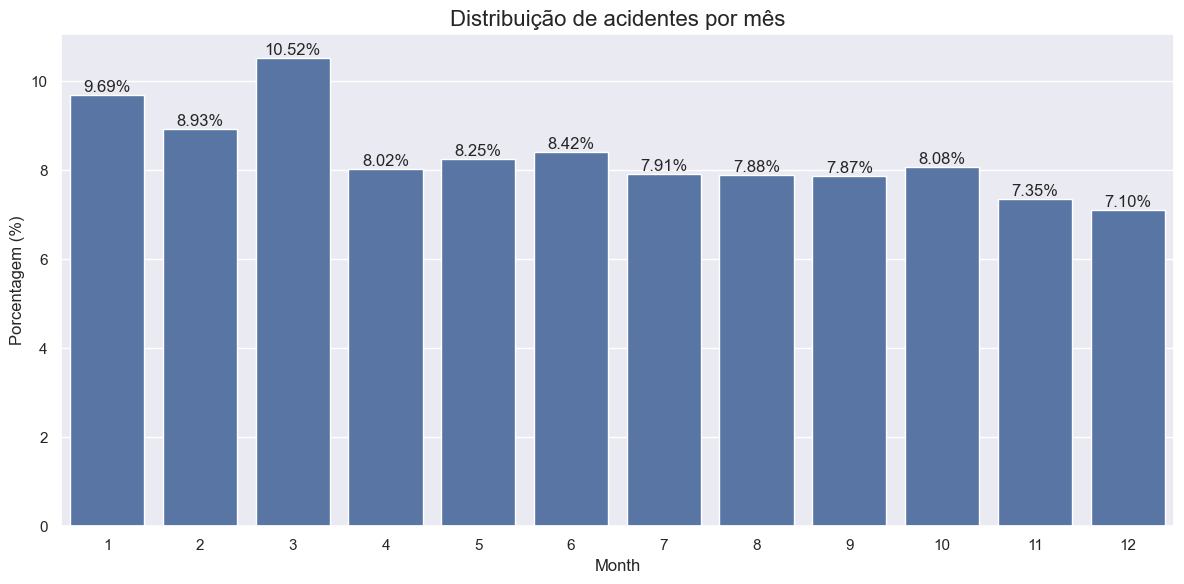

In [6]:
plot_bar_from_column(df=df,
                     column="Month",
                     title="Distribuição de acidentes por mês",
                     percent=True,
                     save_path="../visualizations/exploratory/dist_acidentes_mes.png")

Este gráfico representa a quantidade de acidentes registradas em cada mês. Os primeiros meses apresentam os números mais altos, com o pico dos acidentes no mês de março com 10.52%, em seguida janeiro com 9.69% e fevereiro com 8.93%. 

Ao decorrer do ano, os acidentes se mantêm estáveis no mês de abril até outubro, com uma leve queda em novembro, 7.35%, e dezembro, 7.10%. Isso pode estar ligado com as estações, a mudança de inverno para primavera.

### Day of Week (Dia da Semana)

In [7]:
day_of_week = pd.DataFrame({"Frequence": df["Day of week"].value_counts(),
                            "Percent(%)": round(df["Day of week"]
                            .value_counts(normalize=True)*100, 2)})

day_of_week

,Frequence,Percent(%)
Day of week,,
Friday,36320,15.71
Thursday,33593,14.53
Saturday,33025,14.28
Wednesday,32978,14.26
Tuesday,32656,14.12
Monday,32386,14.01
Sunday,30265,13.09


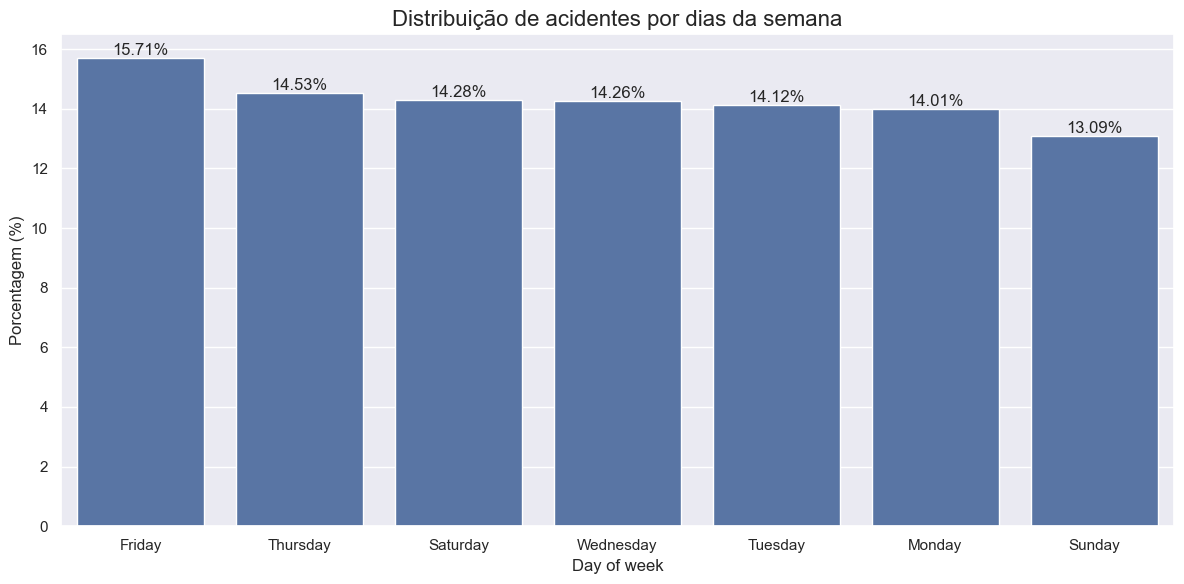

In [8]:
plot_bar_from_column(df=df,
                     column="Day of week",
                     title="Distribuição de acidentes por dias da semana",
                     percent=True,
                     save_path="../visualizations/exploratory/dist_acidentes_semana.png")

Este gráfico apresenta a distribuição de acidentes em cada dia da semana. A sexta-feira registrou a maior proporção, com 15,71% dos acidentes, seguida pela quinta-feira (14,53%) e pelo sábado (14,28%). Os demais dias tiveram valores próximos, variando entre 14,01% (segunda-feira) e 13,09% (domingo).

O fato de a sexta-feira liderar pode estar associado ao aumento do tráfego no início do fim de semana, consumo de álcool ou menor fiscalização, enquanto o domingo, com a menor proporção, pode refletir uma redução na circulação de veículos comerciais ou em deslocamentos de longa distância.

### Time (Horas)

In [9]:
hours = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce")

time = pd.DataFrame({"Frequence": hours.dt.hour.value_counts(),
                     "Percent(%)": round(hours.dt.hour.value_counts(normalize=True)*100, 2)})

time

,Frequence,Percent(%)
Time,,
16,14579,6.31
17,14489,6.27
15,14123,6.11
14,13519,5.85
18,13268,5.74
13,11732,5.07
8,11655,5.04
12,11564,5.00
19,11371,4.92


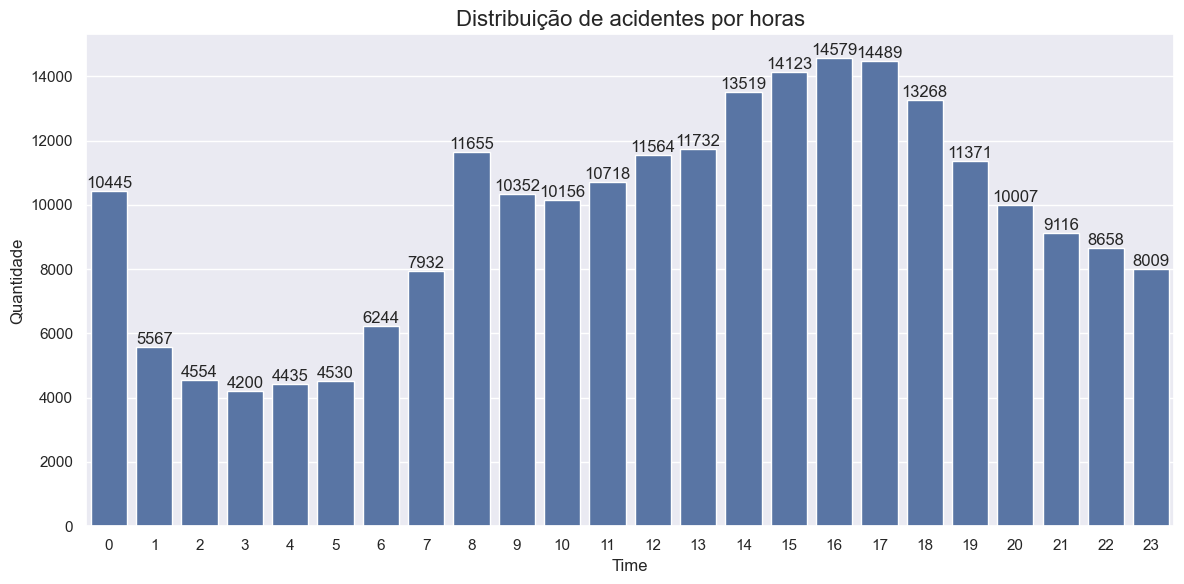

In [10]:

hours = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce")

ax = sns.barplot(x=hours.dt.hour.value_counts().index, 
                 y=hours.dt.hour.value_counts().values)

# Define o tamanho do gráfico
ax.figure.set_size_inches(12, 6)

# Titulos e Legendas
plt.title("Distribuição de acidentes por horas", fontsize=16)
plt.ylabel("Quantidade")
plt.xlabel("Time")

# Plota os valores nas barras
ax.bar_label(ax.containers[0])

# Ajusta o layout
ax.figure.tight_layout()

plt.savefig(dpi=300,
            bbox_inches='tight',
            fname="../visualizations/exploratory/dist_acidentes_horas")

# Exibe o gráfico
plt.show()

### Season (Estações)

In [11]:
season = pd.DataFrame({"Frequence": df["Season"].value_counts(),
                       "Percent(%)": round(df["Season"]
                       .value_counts(normalize=True)*100, 2)})

season

,Frequence,Percent(%)
Season,,
Spring,61948,26.79
Winter,59459,25.72
Summer,55960,24.20
Fall,53856,23.29


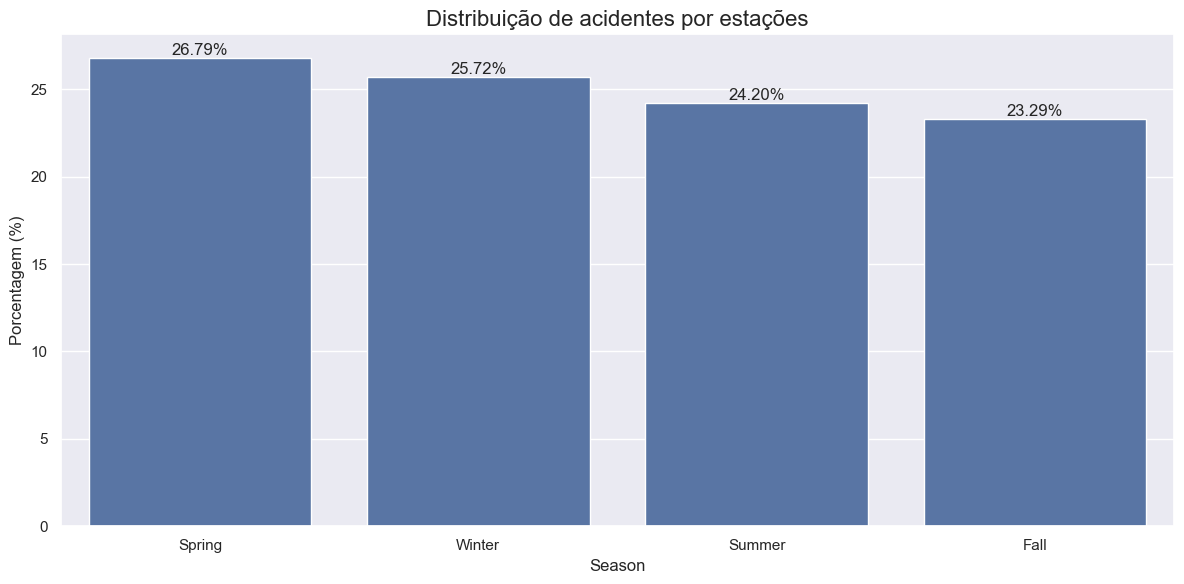

In [12]:
plot_bar_from_column(df=df,
                     column="Season",
                     title="Distribuição de acidentes por estações",
                     percent=True,
                     save_path="../visualizations/exploratory/dist_acidentes_estacoes.png")

Primavera lidera a estação com maior incidência (26.79%), possivelmente devido a aumento de chuvas (piso escorregadio e visibilidade reduzida). Maior movimentação de veículos após o inverno.

Inverno em segundo lugar (25.72%): Condições adversas como neve, geada e neblina contribuem para riscos. Frenagem irregular e menor aderência dos pneus.

Verão e Outono com menores índices: Verão (24.20%): Apesar do clima seco, fatores como viagens de férias e possível aumento de distrações (como uso de celular) mantêm os números elevados.



---

## Univariada Categórica

- Borough
- Contributing Factor
- Street Name
- Vehicle Type

### Borough (bairro)

In [13]:
borough = pd.DataFrame({"Frequence": df["Borough"].value_counts(),
                        "Percent(%)": round(df["Borough"]
                        .value_counts(normalize=True)*100, 2)})

borough

,Frequence,Percent(%)
Borough,,
Brooklyn,76416,33.05
Queens,63751,27.57
Bronx,41254,17.84
Manhattan,38234,16.54
Staten Island,11568,5.00


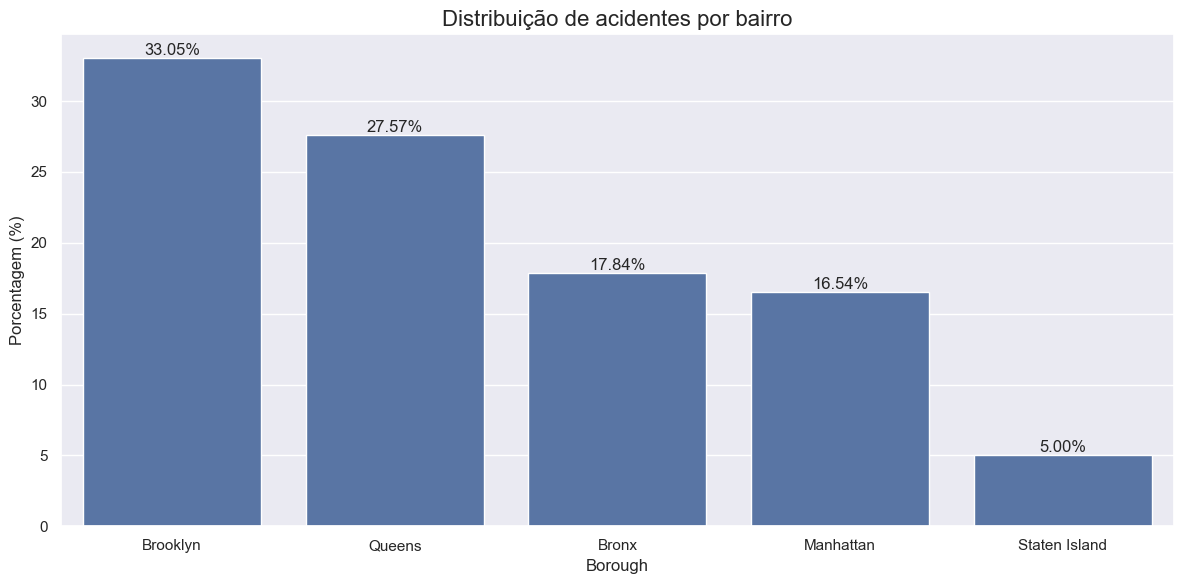

In [14]:
plot_bar_from_column(df=df,
                     column="Borough",
                     title="Distribuição de acidentes por bairro",
                     percent=True,
                     save_path="../visualizations/exploratory/dist_acidentes_bairro.png")

Distribuição de acidentes por bairro

O gráfico mostra que Brooklyn lidera com 33.05% acidentes , seguido por Queens 27.57% , Bronx 17.84% , Manhattan 16.54% e Staten Island com apenas 5.00% acidentes.
 
Brooklyn tem quase 7 vezes mais acidentes que Staten Island, refletindo possivelmente diferenças de população, densidade de tráfego e infraestrutura viária.

### Contributing Factor (fator contribuinte)

In [15]:
contribuing_factor = pd.DataFrame({"Frequence": df["Contributing Factor"].value_counts(),
                                    "Percent(%)": round(df["Contributing Factor"]
                                    .value_counts(normalize=True)*100, 2)})

contribuing_factor.head()

styler = contribuing_factor.head().style.background_gradient(cmap="Blues")

dfi.export(styler, "../visualizations/exploratory/top5_fator_contr__table.png",
           table_conversion="matplotlib",
           dpi=300)

styler

,Frequence,Percent(%)
Contributing Factor,,
Driver Inattention/Distraction,57084,24.690000
Unspecified,57035,24.670000
Failure to Yield Right-of-Way,16263,7.030000
Following Too Closely,13917,6.020000
Passing or Lane Usage Improper,10315,4.460000


Os valores **Não especificados** representa 24.67% da quantidade total, é um valor a se considerar 1/4 

In [16]:
contribuing_factor.tail()

,Frequence,Percent(%)
Contributing Factor,,
Texting,12,0.01
Shoulders Defective/Improper,10,0.00
Cell Phone (hands-free),9,0.00
Windshield Inadequate,7,0.00
Listening/Using Headphones,6,0.00


As causas com pesos menores são: **Enviando mensagens de texto**, **Acostamentos defeituosos / inadequados**, **Uso de celular** **(com viva-voz / mãos-livres)**, **Para-brisa inadequado**, **Ouvindo / Usando fones de ouvido**

In [17]:
valores_unknown = round(df["Contributing Factor"].value_counts(normalize=True)["Unknown"]*100, 2)

valores_unknown

np.float64(0.55)

Já os valores **Desconhecidos** representam 0.55% dos dados, praticamente não tem muita relevancia se tratando do todo

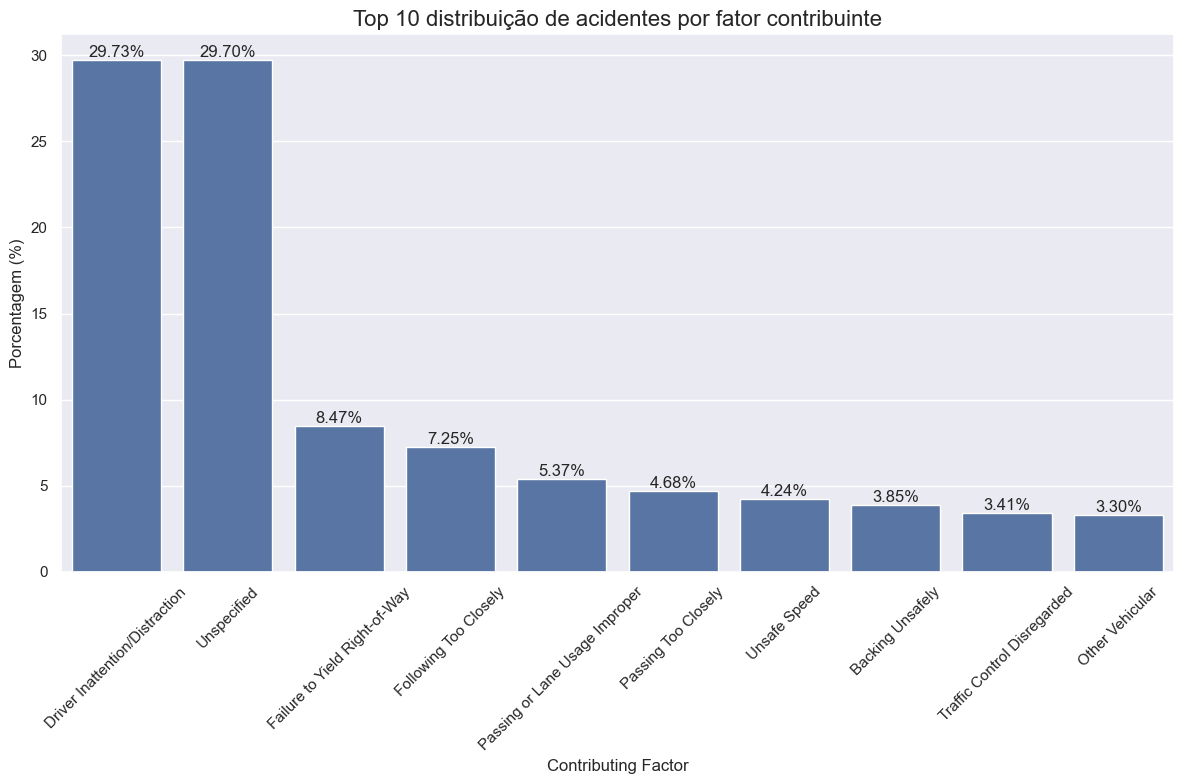

In [18]:
plot_bar_from_column(df=df, 
                     column="Contributing Factor",
                     title="Top 10 distribuição de acidentes por fator contribuinte",
                     top_n=10,
                     rotation=45,
                     figsize=(12, 8),
                     percent=True,
                     save_path="../visualizations/exploratory/top10_dist_acid_fator_contri.png")

Fatores contribuintes para acidentes

Os dois principais fatores são praticamente empatados: **"Driver Inattention/Distraction"** 24.69% e **"Unspecified"** 24.67%. Existe uma queda significativa para o terceiro fator, **"Failure to Yield Right-of-Way"** 7.03%, seguido por **"Following Too Closely"** 6.02%.

Se compararmos só o top 10, os valores **"Driver Inattention/Distraction"** representa 29.73% e **"Unspecified"** 29.70%.

Os dados sugerem que a desatenção ao volante é um problema crítico, enquanto o alto número de casos não especificados indica possíveis deficiências no registro de informações.

### Street Name (nome da rua)

In [19]:
street_name = pd.DataFrame({"Frequence": df["Street Name"].value_counts(),
                            "Percent(%)": round(df["Street Name"]
                            .value_counts(normalize=True)*100, 2)}).head(10)

street_name

,Frequence,Percent(%)
Street Name,,
Belt Parkway,3408,1.47
Broadway,2738,1.18
Atlantic Avenue,2181,0.94
Long Island Expressway,2165,0.94
Brooklyn Queens Expressway,2039,0.88
Fdr Drive,1899,0.82
3 Avenue,1705,0.74
Grand Central Pkwy,1639,0.71
Cross Island Parkway,1579,0.68


Os valores de acidente na rua **Belt Parkway** representam 1.47% dos acidentes totais.

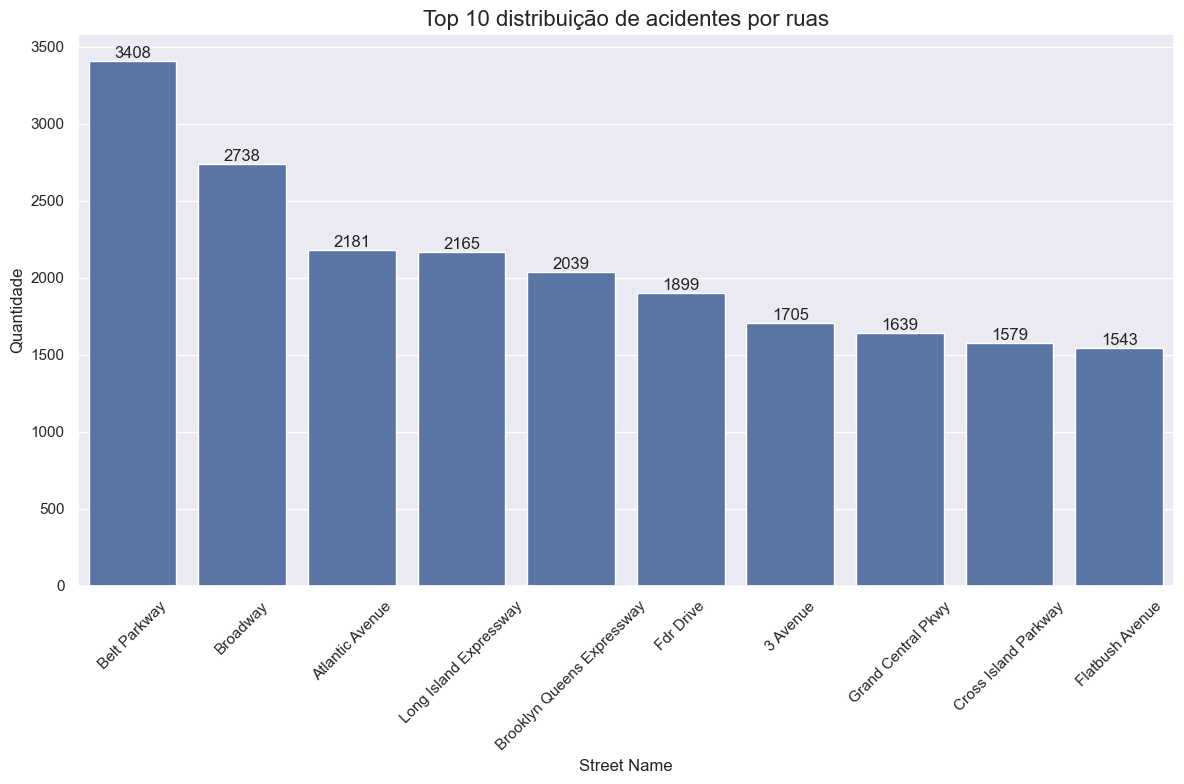

In [20]:
plot_bar_from_column(df=df,
                     column="Street Name",
                     title="Top 10 distribuição de acidentes por ruas",
                     rotation=45,
                     top_n=10,
                     figsize=(12, 8),
                     save_path="../visualizations/exploratory/top10_dist_acid_ruas.png")

Ruas com mais acidentes

**Belt Parkway** lidera com 3.408 acidentes, seguida por **Broadway** (2.738), **Atlantic Avenue** (2.181) e **Long Island Expressway** (2.165). 

As vias expressas e avenidas principais concentram os maiores números de acidentes, provavelmente devido ao maior volume de tráfego.

### Vehicle Type (tipo de veículo)

In [21]:
vehicle_type = pd.DataFrame({"Frequence": df["Vehicle Type"].value_counts(),
                             "Percent(%)": round(df["Vehicle Type"]
                             .value_counts(normalize=True)*100, 2)})

vehicle_type

,Frequence,Percent(%)
Vehicle Type,,
Passenger Vehicle,195732,84.65
Transport,6430,2.78
Taxi,5829,2.52
Bicycle,5281,2.28
Bus,4124,1.78
Not Reported,3079,1.33
Scooter,2074,0.90
Motorcycle,1945,0.84
Emergency Services,1792,0.78


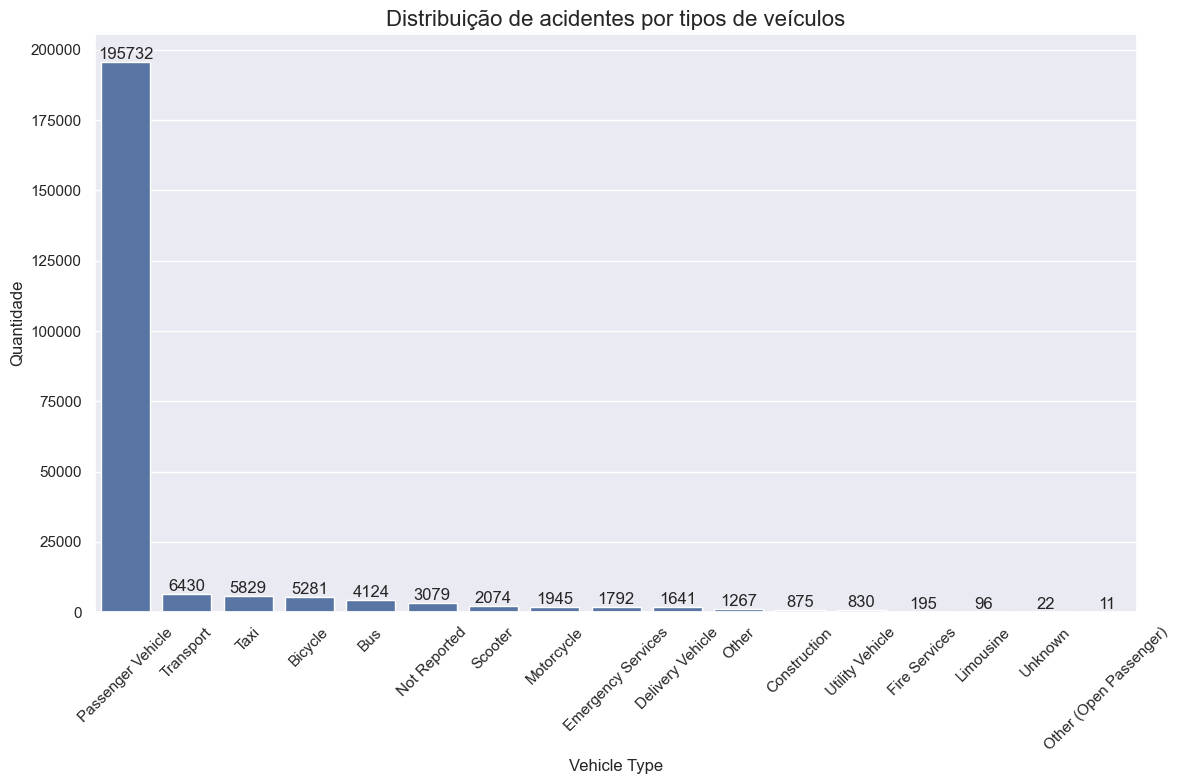

In [22]:
plot_bar_from_column(df=df, 
                     column="Vehicle Type",
                     title="Distribuição de acidentes por tipos de veículos",
                     rotation=45,
                     figsize=(12, 8),
                     save_path="../visualizations/exploratory/dist_acid_tipos_veiculos.png")

Tipos de veículos envolvidos

Há uma discrepância extraordinária entre **"Passenger Vehicle"** com 84.65% das ocorrências. Bem distante estão os veículos de **transporte** 2.78%, **táxis** 2.52% e **bicicletas** 2.28%.

Esta distribuição reflete o predomínio de carros particulares nas ruas de Nova York, sendo responsáveis pela grande maioria dos acidentes.

## Univariada Numérica

exibindo apenas as colunas

In [23]:
numerical = df.select_dtypes(include="int64")

# Exibi apenas as colunas numéricas
numerical.iloc[:, 1:9].head(0)


,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed


### Persons Injured/Killed (Pessoas feridas/Mortas)

In [24]:
# Persons Injured
persons_injured = pd.DataFrame({"Frequence": df["Persons Injured"].value_counts(),
                                "Percent(%)": round(df["Persons Injured"]
                                .value_counts(normalize=True)*100, 2)})

persons_injured

,Frequence,Percent(%)
Persons Injured,,
0,146804,63.49
1,66174,28.62
2,12308,5.32
3,3801,1.64
4,1352,0.58
5,461,0.20
6,172,0.07
7,79,0.03
8,31,0.01


In [25]:
# Persons Killed
persons_killed = pd.DataFrame({"Frequence": df["Persons Killed"].value_counts(),
                               "Percent(%)": round(df["Persons Killed"]
                               .value_counts(normalize=True)*100, 2)})

persons_killed

,Frequence,Percent(%)
Persons Killed,,
0,230633,99.74
1,573,0.25
2,14,0.01
3,3,0.00


In [26]:
shape = df[df["Year"].isin([2021, 2022])].shape[0]

mean_injured = (df[df['Year'].isin([2021, 2022])]
                .groupby('Year')['Persons Injured'].sum().mean())

mean_killed = (df[df['Year'].isin([2021, 2022])]
                .groupby('Year')['Persons Killed'].sum().mean())

print(f"A média de pessoas feridas anualmente é de {mean_injured}"
      f"em porcentagem {(mean_injured / shape)*100:.2f}%")

print(f"A média de pessoas mortas anualmente é de {mean_killed}"
      f"em porcentagem {(mean_killed / shape)*100:.2f}%")


A média de pessoas feridas anualmente é de 50065.5em porcentagem 24.09%
A média de pessoas mortas anualmente é de 278.0em porcentagem 0.13%


#### Persons Killed

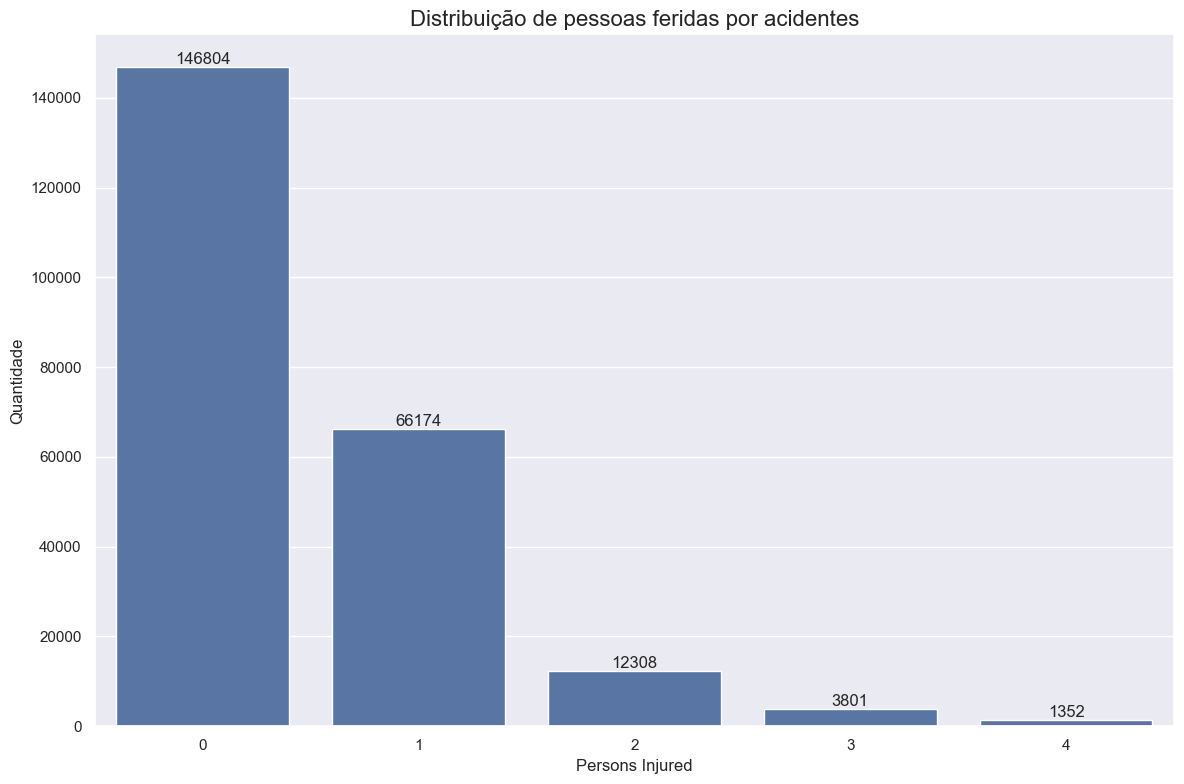

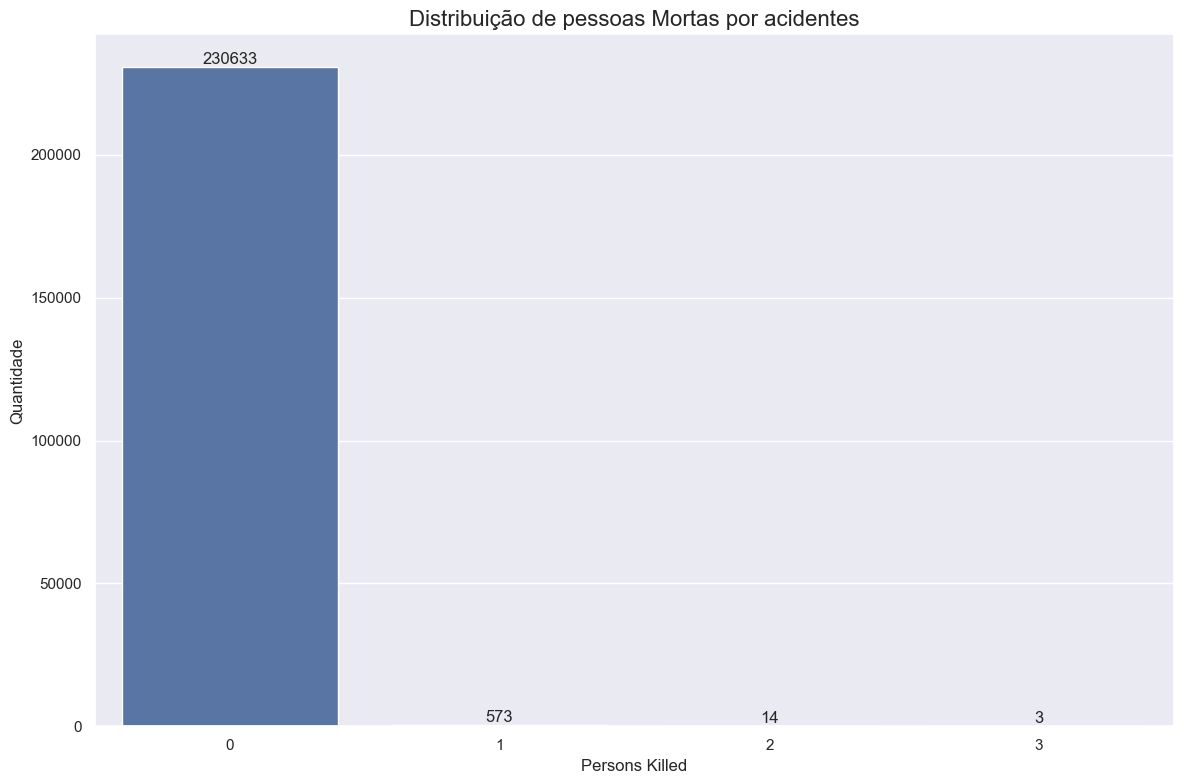

In [27]:
# Persons Injured
plot_bar_from_column(df=df, 
                     column="Persons Injured",
                     title="Distribuição de pessoas feridas por acidentes",
                     top_n=5,
                     figsize=(12, 8),
                     save_path="../visualizations/exploratory/dist_pessoas_ferida_acid.png")

# Persons Killed
plot_bar_from_column(df=df, 
                     column="Persons Killed",
                     title="Distribuição de pessoas Mortas por acidentes",
                     figsize=(12, 8),
                     save_path="../visualizations/exploratory/dist_pessoas_mortas_acid.png")

Olhando para os números dos acidentes de trânsito, encontramos uma história interessante sobre segurança nas estradas.

**A boa notícia primeiro:** a grande maioria dos acidentes não causa vítimas fatais. De todos os registros, impressionantes 99,74% não resultaram em mortes. E em 63,49% dos casos, nem feridos houve.

**Quando falamos em feridos:** cerca de um terço dos acidentes deixa alguém machucado, com a maioria destes casos (28,6%) tendo apenas uma vítima. À medida que o número de feridos aumenta, os casos se tornam cada vez mais raros.

**Quanto às fatalidades:** apenas 0,26% dos acidentes resultam em mortes - um número muito menor que o de acidentes com feridos. A maioria desses casos fatais (0,25%) vitima apenas uma pessoa.

**O contraste é revelador:** enquanto registramos casos extremos com até 34 feridos em um único acidente (provavelmente envolvendo ônibus ou veículos maiores), o máximo de mortes em um único acidente foi apenas 3.

Estes dados nos contam que, embora acidentes aconteçam com frequência, raramente são letais possivelmente graças aos avanços em segurança veicular e ao atendimento médico de emergência que evita que ferimentos se transformem em tragédias.

### Pedestrians Injured/Killed (Pedestres Feridos/Mortos)

In [28]:
# Pedestrians Injured
pedestrians_injured = pd.DataFrame({"Frequence": df["Pedestrians Injured"].value_counts(),
                                    "Percent(%)": round(df["Pedestrians Injured"]
                                    .value_counts(normalize=True)*100, 2)})

pedestrians_injured

,Frequence,Percent(%)
Pedestrians Injured,,
0,213356,92.27
1,17220,7.45
2,582,0.25
3,48,0.02
4,8,0.00
5,6,0.00
6,2,0.00
19,1,0.00


In [29]:
# Pedestrians Killed
pedestrians_killed = pd.DataFrame({"Frequence": df["Pedestrians Killed"].value_counts(),
                                   "Percent(%)": round(df["Pedestrians Killed"]
                                   .value_counts(normalize=True)*100, 2)})

pedestrians_killed

,Frequence,Percent(%)
Pedestrians Killed,,
0,230947,99.88
1,274,0.12
2,2,0.00


In [30]:
shape = df[df["Year"].isin([2021, 2022])].shape[0]

mean_injured = (df[df['Year'].isin([2021, 2022])]
                .groupby('Year')['Pedestrians Injured'].sum().mean())

mean_killed = (df[df['Year'].isin([2021, 2022])]
                .groupby('Year')['Pedestrians Killed'].sum().mean())

print(f"A média de pedestres feridos anualmente é de {mean_injured}" 
      f"em porcentagem {(mean_injured / shape)*100:.2f}%")

print(f"A média de pedestres mortos anualmente é de {mean_killed}"
      f"em porcentagem {(mean_killed / shape)*100:.2f}%")


A média de pedestres feridos anualmente é de 8118.5em porcentagem 3.91%
A média de pedestres mortos anualmente é de 127.0em porcentagem 0.06%


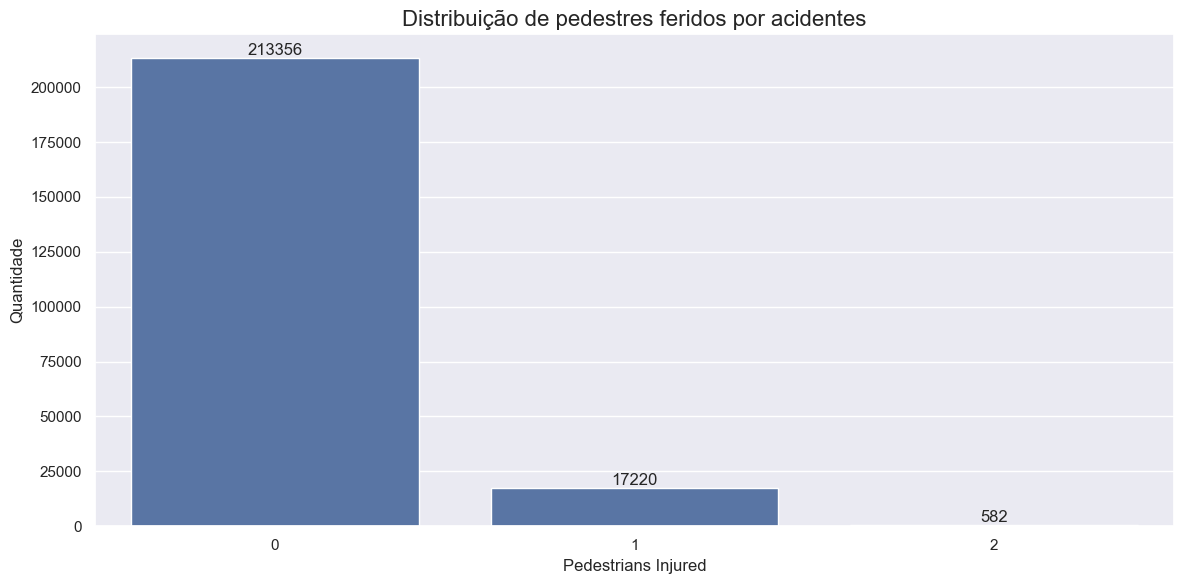

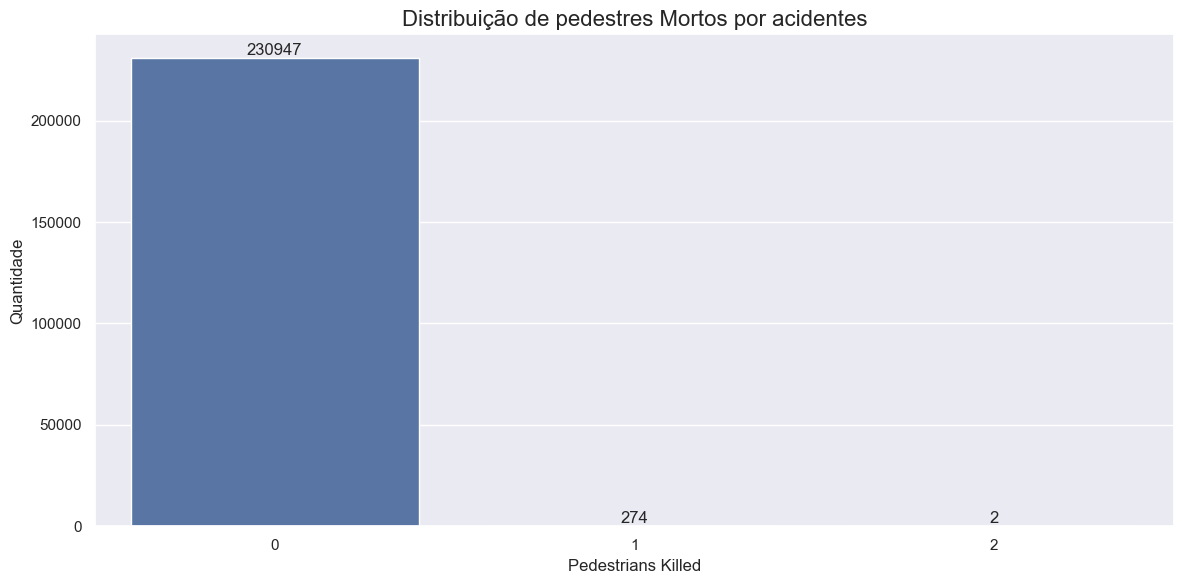

In [31]:
# Pedestrian Injured
plot_bar_from_column(df=df, 
                     column="Pedestrians Injured",
                     title="Distribuição de pedestres feridos por acidentes",
                     top_n=3,
                     figsize=(12, 6),
                     save_path="../visualizations/exploratory/dist_pedestres_feridos_acid.png")

#Pedestrian Killed
plot_bar_from_column(df=df, 
                     column="Pedestrians Killed",
                     title="Distribuição de pedestres Mortos por acidentes",
                     figsize=(12, 6),
                     save_path="../visualizations/exploratory/dist_pedestres_mortos_acid.png")

Olhando para os dados sobre pedestres envolvidos em acidentes, vemos um quadro que traz algum alívio, apesar das preocupações com segurança viária.

**Pedestres feridos:** A grande maioria dos acidentes (92,27%) não envolve pedestres feridos. Quando há ferimentos, geralmente é apenas uma pessoa (7,45% dos casos). Situações com múltiplos pedestres feridos são extremamente raras apenas 0,25% dos acidentes ferem dois pedestres.

**Pedestres fatalmente atingidos:** Os números são ainda mais contundentes quando falamos de fatalidades. 99,88% dos acidentes não resultam em mortes de pedestres. Apenas 0,12% dos acidentes (274 casos) resultam na morte de um pedestre, e apenas 2 acidentes em todo o registro resultaram em dois pedestres mortos.

**Um caso extremo:** Há registro de um único acidente com 19 pedestres feridos possivelmente um evento atípico envolvendo um veículo descontrolado em área de grande circulação de pessoas.

Esta análise revela que, embora o envolvimento de pedestres em acidentes seja preocupante, a frequência de casos graves é relativamente baixa. Isso pode refletir melhorias na segurança urbana para pedestres, mas também sugere a necessidade contínua de atenção às áreas onde pedestres e veículos compartilham espaços.

### Cyclists Injured (Ciclistas Feridos)

In [32]:
# Cyclists Injured
cyclists_injured = pd.DataFrame({"frequence": df["Cyclists Injured"].value_counts(),
                                 "Percent": round(df["Cyclists Injured"]
                                 .value_counts(normalize=True)*100, 2)})

cyclists_injured

,frequence,Percent
Cyclists Injured,,
0,220705,95.45
1,10367,4.48
2,143,0.06
3,8,0.00


In [33]:
# Cyclists Killed
cyclists_killed = pd.DataFrame({"frequence": df["Cyclists Killed"].value_counts(),
                                "Percent": round(df["Cyclists Killed"]
                                .value_counts(normalize=True)*100, 2)})
cyclists_killed

,frequence,Percent
Cyclists Killed,,
0,231179,99.98
1,44,0.02


In [34]:
shape = df[df["Year"].isin([2021, 2022])].shape[0]

mean_injured = (df[df['Year'].isin([2021, 2022])]
                .groupby('Year')['Cyclists Injured'].sum().mean())

mean_killed = (df[df['Year'].isin([2021, 2022])]
                .groupby('Year')['Cyclists Killed'].sum().mean())

print(f"A média de ciclistas feridos anualmente é de {mean_injured}"
      f"em porcentagem {(mean_injured / shape)*100:.2f}%")

print(f"A média de ciclistas mortos anualmente é de {mean_killed}"
      f"em porcentagem {(mean_killed / shape)*100:.2f}%")


A média de ciclistas feridos anualmente é de 4878.0em porcentagem 2.35%
A média de ciclistas mortos anualmente é de 17.5em porcentagem 0.01%


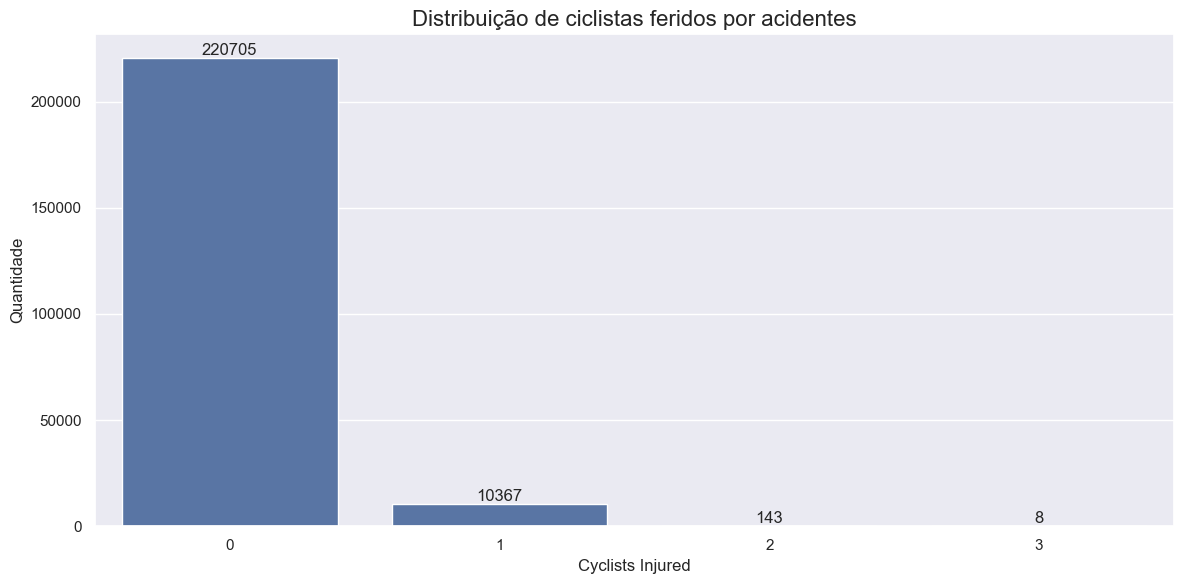

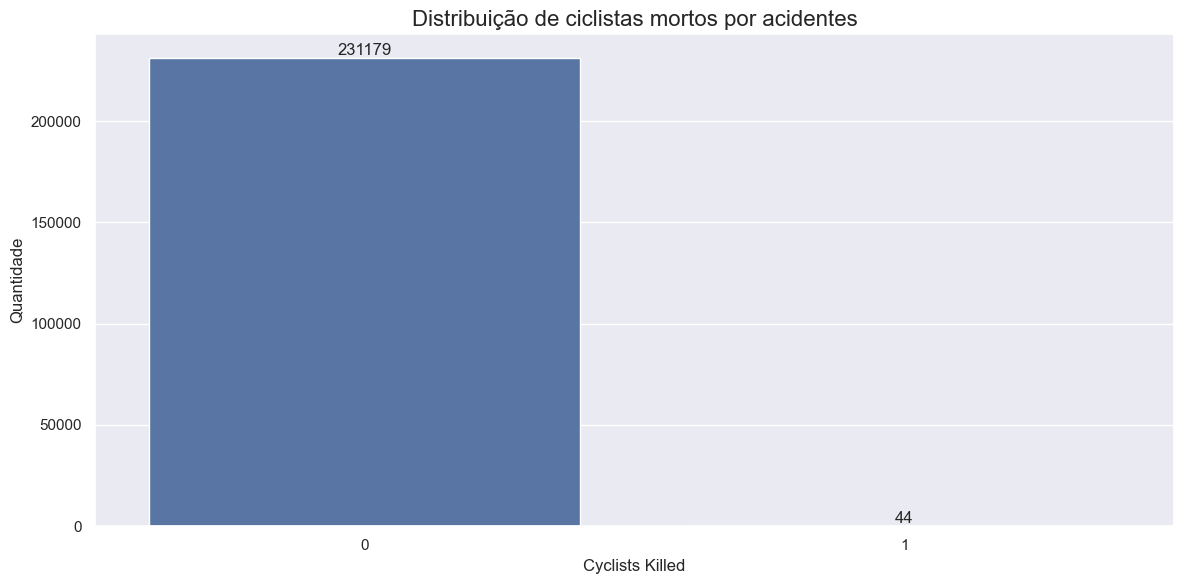

In [35]:
# Cyclists Injured
plot_bar_from_column(df=df, 
                     column="Cyclists Injured",
                     title="Distribuição de ciclistas feridos por acidentes",
                     figsize=(12, 6),
                     save_path="../visualizations/exploratory/dist_ciclistas_feridos_acid.png")

# Cyclists Killed
plot_bar_from_column(df=df, 
                     column="Cyclists Killed",
                     title="Distribuição de ciclistas mortos por acidentes",
                     figsize=(12, 6),
                     save_path="../visualizations/exploratory/dist_ciclistas_mortos_acid.png")

Analisando os dados sobre ciclistas envolvidos em acidentes, observamos um panorama que traz perspectivas importantes sobre este grupo específico no trânsito.

**Ciclistas feridos:** Os números mostram que 95,45% dos acidentes não envolvem ciclistas feridos. Quando há ferimentos, quase sempre é apenas um ciclista (4,48% dos casos). Situações com dois ciclistas feridos são muito raras (0,06%), e acidentes com três ciclistas feridos praticamente não acontecem (apenas 8 casos registrados).

**Ciclistas fatalmente atingidos:** As estatísticas são ainda mais expressivas quando falamos de mortes. 99,98% dos acidentes não resultam em fatalidades de ciclistas. Apenas 0,02% dos acidentes (44 casos) resultaram na morte de um ciclista, e não há registros de acidentes com múltiplas mortes.

Estes dados revelam que, embora ciclistas representem um grupo vulnerável no trânsito, a ocorrência de acidentes graves envolvendo este grupo é relativamente baixa. Isso pode refletir tanto o número ainda limitado de ciclistas em comparação com outros meios de transporte, quanto os esforços para melhorar a infraestrutura cicloviária e a conscientização no trânsito.

### Motorists Injured (Motoristas Feridos)

In [36]:
# Motorists Injured
motorists_injured = pd.DataFrame({"Frequence": df["Motorists Injured"].value_counts(),
                                  "Percent": round(df["Motorists Injured"]
                                  .value_counts(normalize=True)*100, 2)})

motorists_injured

,Frequence,Percent
Motorists Injured,,
0,179221,77.51
1,35227,15.24
2,11021,4.77
3,3676,1.59
4,1324,0.57
5,445,0.19
6,162,0.07
7,79,0.03
8,30,0.01


In [37]:
# Motorists Killed
motorists_killed = pd.DataFrame({"Frequence": df["Motorists Killed"].value_counts(),
                                 "Percent": round(df["Motorists Killed"]
                                 .value_counts(normalize=True)*100, 2)})

motorists_killed

,Frequence,Percent
Motorists Killed,,
0,230985,99.9
1,225,0.1
2,10,0.0
3,3,0.0


In [38]:
shape = df[df["Year"].isin([2021, 2022])].shape[0]

mean_injured = (df[df['Year'].isin([2021, 2022])]
                .groupby('Year')['Motorists Injured'].sum().mean())

mean_killed = (df[df['Year'].isin([2021, 2022])]
                .groupby('Year')['Motorists Killed'].sum().mean())

print(f"A média de motoristas feridos anualmente é de {mean_injured}"
      f"em porcentagem {(mean_injured / shape)*100:.2f}%")

print(f"A média de motoristas mortos anualmente é de {mean_killed}" 
      f"em porcentagem {(mean_killed / shape)*100:.2f}%")


A média de motoristas feridos anualmente é de 34852.0em porcentagem 16.77%
A média de motoristas mortos anualmente é de 117.5em porcentagem 0.06%


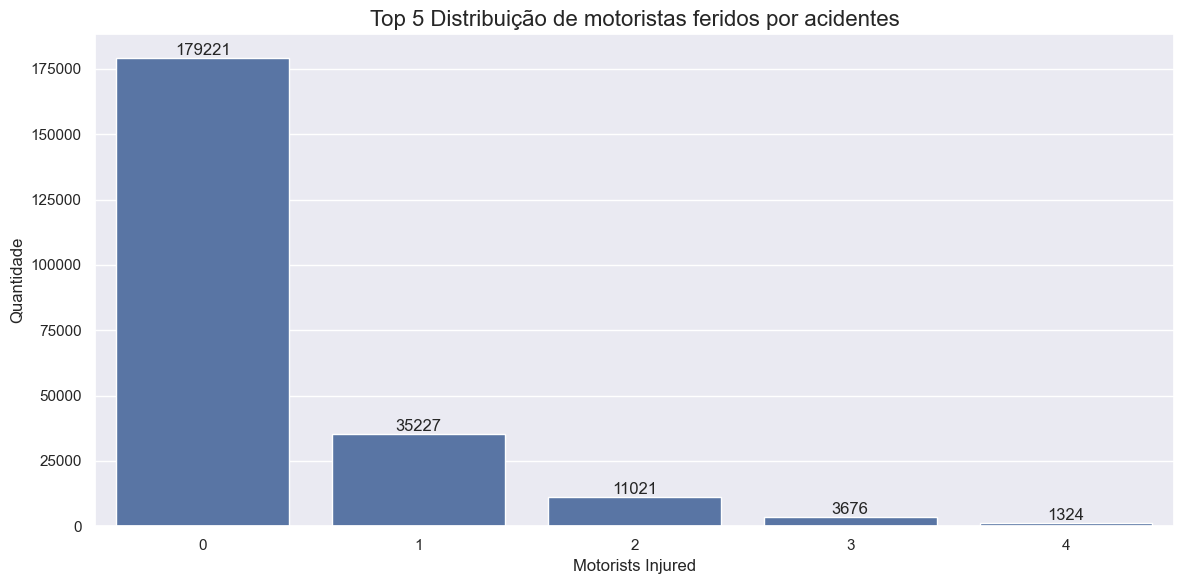

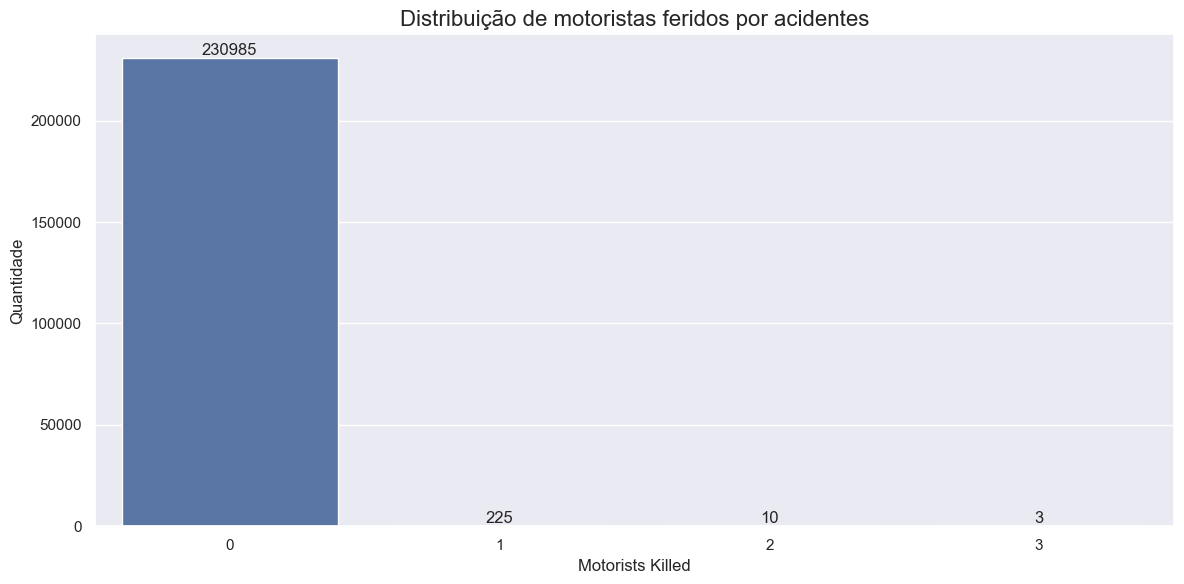

In [39]:
# Motorists Injured
plot_bar_from_column(df=df, 
                     column="Motorists Injured",
                     title="Top 5 Distribuição de motoristas feridos por acidentes",
                     top_n=5,
                     save_path="../visualizations/exploratory/top5_dist_motoristas_feridos_acid.png")

# Motorists Killed
plot_bar_from_column(df=df, 
                     column="Motorists Killed",
                     title="Distribuição de motoristas feridos por acidentes",
                     save_path="../visualizations/exploratory/dist_motoristas_mortos_acid.png")

Observando os dados sobre motoristas e ocupantes de veículos em acidentes, encontramos padrões sobre o grupo que representa a maior parte dos envolvidos em ocorrências no trânsito.

**Motoristas e passageiros feridos:** Diferente dos pedestres e ciclistas, este grupo apresenta números mais significativos. Em 77,51% dos acidentes ninguém se feriu dentro dos veículos, mas 15,24% dos casos registraram uma pessoa ferida e 4,77% resultaram em dois feridos. A proporção continua diminuindo conforme aumenta o número de feridos, mas chega a casos extremos com até 40 pessoas (possivelmente em acidentes com ônibus ou veículos de transporte coletivo).

**Motoristas e passageiros fatalmente atingidos:** Apesar do maior envolvimento em ferimentos, as fatalidades continuam baixas. 99,9% dos acidentes não resultam em mortes de ocupantes de veículos. Apenas 0,1% dos acidentes (225 casos) resultaram em uma morte, 10 acidentes registraram duas mortes e somente 3 casos tiveram três vítimas fatais.
Estes dados mostram que, embora os ocupantes de veículos representem o maior grupo de feridos em acidentes, a taxa de sobrevivência é alta. Isso provavelmente reflete a eficácia dos dispositivos de segurança nos veículos modernos, como cintos, airbags e estruturas projetadas para absorver impactos, transformando o que poderia ser um acidente fatal em um incidente com ferimentos não letais.

---

## Bivariada Temporal

- Mapa de calor: Dia da semana × Horário
- Mês × Fator Contribuinte
- Mês × Vehicle Type


In [40]:
df.head()

,Collision ID,Date,Time,Borough,Street Name,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,...,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Year,Month,Month Name,Day of week,Day,Season
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,40.68730,-73.973656,Unspecified,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,Fell Asleep,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,40.88270,-73.892730,Unknown,Not Reported,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,40.63791,-73.978640,Unspecified,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter


### Time x Day of Week (Horário x Dia da Semana)

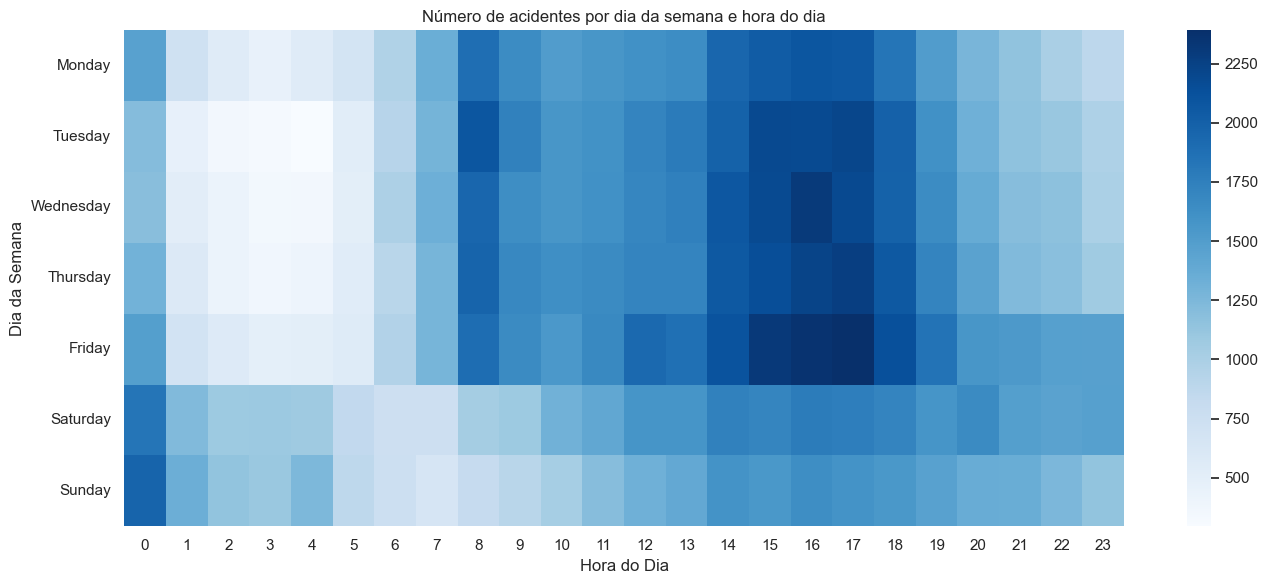

In [41]:
# Converter 'Time' apenas no momento do uso, para extrair a hora
heatmap_data = (df.groupby([df['Day of week'], pd.to_datetime(df['Time'],
                            format='%H:%M:%S',
                            errors='coerce').dt.hour]).size().unstack(fill_value=0))

# Reordenar os dias da semana 
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(dias_ordem)

# Plotar o heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="Blues")
plt.title("Número de acidentes por dia da semana e hora do dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Dia da Semana")
plt.tight_layout()

plt.savefig(dpi=300,
            bbox_inches='tight',
            fname="../visualizations/exploratory/acid_semana_x_horadia.png")

plt.show()


Analisando o mapa de calor, podemos observar padrões claros na distribuição de acidentes por dia da semana e hora do dia:

**Principais observações:**

- **Horários de pico nos dias úteis:** Há uma concentração significativa de acidentes entre 14h-19h (período da tarde/noite) de segunda a sexta-feira, com o pico mais intenso ocorrendo por volta das 16h-17h.

- **Padrão matinal:** Outro período crítico acontece por volta das 8h-10h nos dias úteis, coincidindo com o horário de deslocamento para o trabalho.

- **Comportamento de fim de semana:** Sábados e domingos apresentam padrões distintos:
As primeiras horas da madrugada (0h-1h) mostram concentrações elevadas, provavelmente relacionadas à vida noturna
Os horários de pico são menos pronunciados durante o dia
Há uma distribuição mais homogênea ao longo do dia


- **Período noturno**: De forma geral, a quantidade de acidentes reduz drasticamente durante a madrugada (2h-5h) em todos os dias da semana, representado pelas áreas mais claras do mapa de calor.

### All Injured x Contributing Factor (Total Feridos x Fator Contribuinte)

In [42]:
# Filtra para registros com pelo menos um ferido
filtered_df = df[
    (df["Persons Injured"] >= 1) |
    (df["Cyclists Injured"] >= 1) |
    (df["Motorists Injured"] >= 1) |
    (df["Pedestrians Injured"])
].copy()

# Cria a coluna de total de feridos
filtered_df["Total Injured"] = (
    filtered_df["Persons Injured"] +
    filtered_df["Cyclists Injured"] +
    filtered_df["Motorists Injured"] +
    filtered_df["Pedestrians Injured"]
)

# Agrupa por fator contribuinte e soma o total de feridos
total_Injured = (filtered_df.groupby("Contributing Factor")["Total Injured"]
               .sum()
               .sort_values(ascending=False))

total_Injured


Contributing Factor
Driver Inattention/Distraction                           55921
Unspecified                                              40811
Failure to Yield Right-of-Way                            24854
Following Too Closely                                    16276
Unsafe Speed                                             11637
Traffic Control Disregarded                              10926
Passing or Lane Usage Improper                            6768
Other Vehicular                                           5657
Turning Improperly                                        4592
Unsafe Lane Changing                                      4156
Driver Inexperience                                       4145
Alcohol Involvement                                       3982
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     3544
Backing Unsafely                                          3180
Reaction to Uninvolved Vehicle                            3086
View Obstructed/Limited            

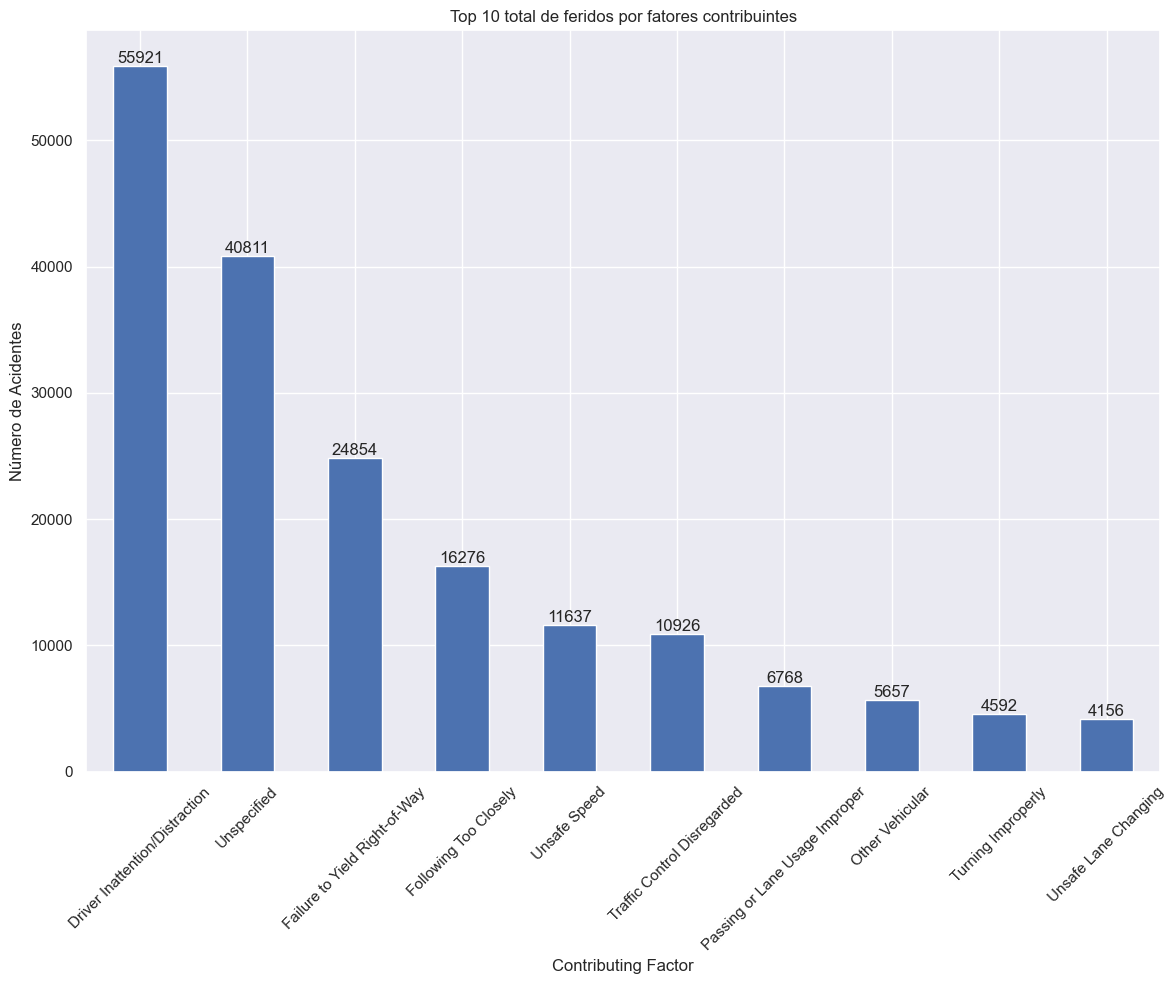

In [43]:
ax = total_Injured.head(10).plot(kind="bar", stacked=True, figsize=(12, 10))
plt.title("Top 10 total de feridos por fatores contribuintes")
plt.xlabel("Contributing Factor")
plt.ylabel("Número de Acidentes")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout()

plt.show()


### All Killed x Contributing Factor (Total Mortos x Fator Contribuinte)

In [44]:
# Filtra para registros com pelo menos uma morte
filtered_df = df[
    (df["Persons Killed"] >= 1) |
    (df["Cyclists Killed"] >= 1) |
    (df["Motorists Killed"] >= 1) |
    (df["Pedestrians Killed"]) 
].copy()

# Cria a coluna de total de mortos
filtered_df["Total Killed"] = (
    filtered_df["Persons Killed"] +
    filtered_df["Cyclists Killed"] +
    filtered_df["Motorists Killed"] +
    filtered_df["Pedestrians Killed"]
)

# Agrupa por fator contribuinte e soma o total de mortos
total_killed = (filtered_df.groupby("Contributing Factor")["Total Killed"]
               .sum()
               .sort_values(ascending=False))

total_killed


Contributing Factor
Unspecified                                              327
Unsafe Speed                                             274
Driver Inattention/Distraction                           143
Failure to Yield Right-of-Way                             90
Traffic Control Disregarded                               67
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     49
Alcohol Involvement                                       46
Lost Consciousness                                        30
Driver Inexperience                                       30
Unknown                                                   18
Aggressive Driving/Road Rage                              17
Passing or Lane Usage Improper                            14
Illnes                                                    12
Turning Improperly                                         8
Backing Unsafely                                           6
View Obstructed/Limited                                    6
Unsa

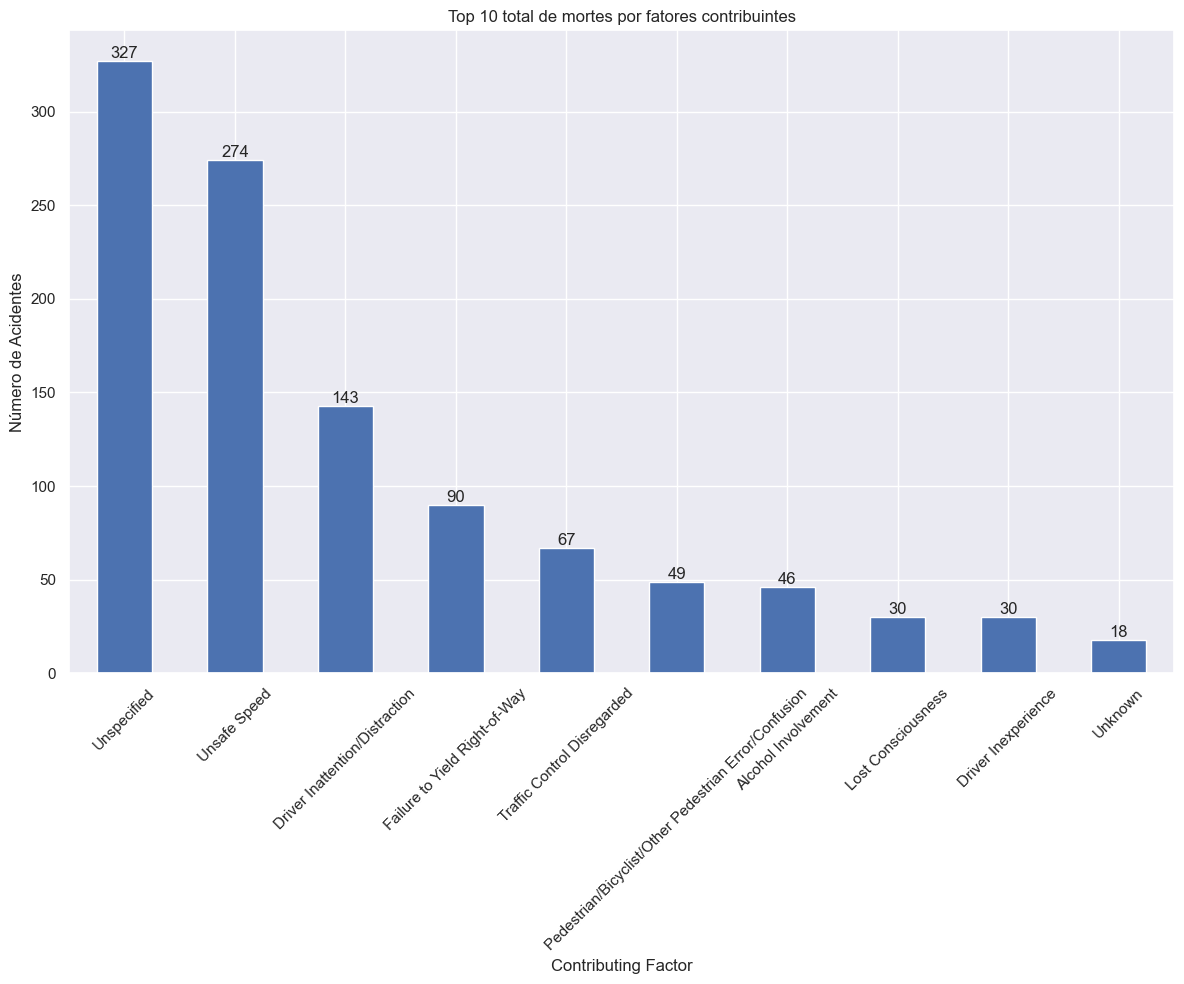

In [45]:
ax = total_killed.head(10).plot(kind="bar", stacked=True, figsize=(12, 10))
plt.title("Top 10 total de mortes por fatores contribuintes")
plt.xlabel("Contributing Factor")
plt.ylabel("Número de Acidentes")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout()

plt.savefig(dpi=300,
            bbox_inches='tight',
            fname="../visualizations/exploratory/top10_mortes_po_fataor_contr.png")

plt.show()


### Time x Contributing Factor (Horário x Fator Contribuinte)

In [46]:
top_5_types = df['Contributing Factor'].value_counts().nlargest(5).index

filtered_df = df[df['Contributing Factor'].isin(top_5_types)]

hours_x_type = filtered_df.groupby([pd.to_datetime(df['Time'],
                            format='%H:%M:%S',
                            errors='coerce').dt.hour, 'Contributing Factor']
                            ).size().unstack().fillna(0)

styler = hours_x_type.style.background_gradient(cmap="Blues")

dfi.export(styler, "../visualizations/exploratory/top5_fator_contr_horas_table.png",
           table_conversion="matplotlib",
           dpi=300)

styler

Contributing Factor,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely,Passing or Lane Usage Improper,Unspecified
Time,,,,,
0,2592,482,546,415,2475
1,1325,205,246,214,1232
2,1055,153,177,163,976
3,1006,131,178,122,923
4,1116,134,184,141,949
5,1091,186,212,173,1052
6,1525,404,323,253,1558
7,1757,562,511,402,2059
8,2729,919,745,597,2949


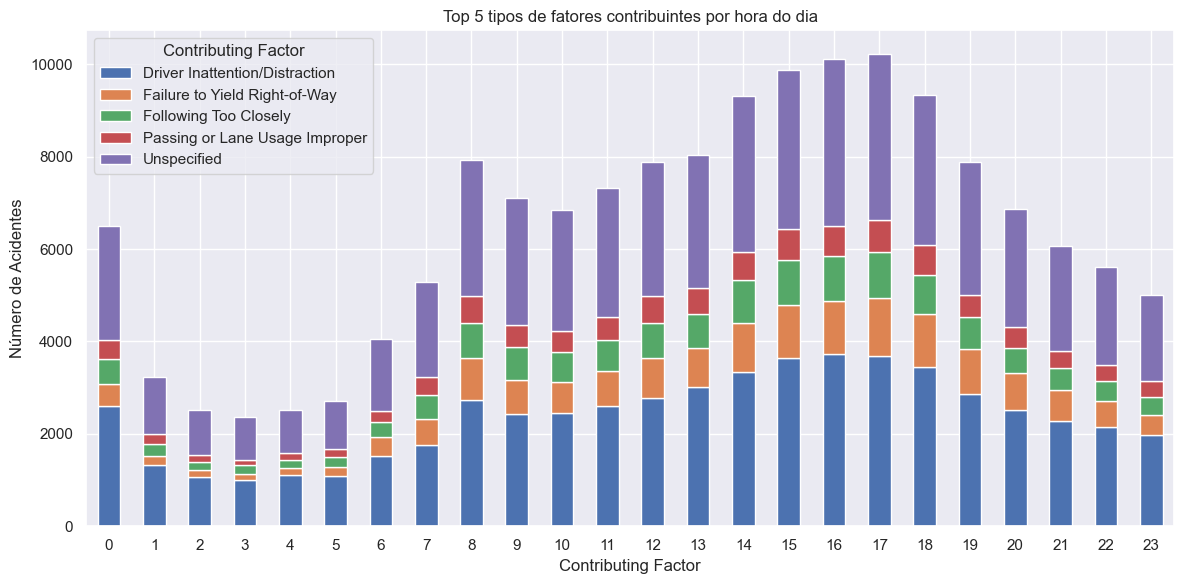

In [47]:
top_5_types = df['Contributing Factor'].value_counts().nlargest(5).index

filtered_df = df[df['Contributing Factor'].isin(top_5_types)]

month_x_type = filtered_df.groupby([pd.to_datetime(df['Time'],
                            format='%H:%M:%S',
                            errors='coerce').dt.hour, 'Contributing Factor']
                            ).size().unstack().fillna(0)

# Plotar gráfico de barras empilhadas
month_x_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 5 tipos de fatores contribuintes por hora do dia')
plt.xlabel('Contributing Factor')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig(dpi=300,
            bbox_inches='tight',
            fname="../visualizations/exploratory/top5_fator_contr_horas.png")

plt.show()


Analisando os dados sobre os fatores contribuintes para acidentes por hora do dia, podemos identificar padrões interessantes que revelam quando e por que os acidentes acontecem.

**Desatenção/Distração do Motorista:** Destaca-se como o principal fator em todas as horas do dia, com picos expressivos entre 14h e 18h. O maior número ocorre às 16h, com 3.724 casos. É notável como este fator aumenta progressivamente durante o dia, sugerindo que o cansaço acumulado pode intensificar a desatenção.

**Fatores Não Especificados:** Mantêm-se consistentemente como o segundo maior contribuinte. Os picos também acontecem no período da tarde, com máximo às 16h (3.601 casos). Embora não identifiquem causas específicas, estes números significativos indicam a necessidade de melhorar os relatórios de acidentes.

**Falha em Ceder o Direito de Passagem:** Este fator segue o padrão dos anteriores, aumentando durante o dia e atingindo seu ápice às 17h (1.252 casos). É particularmente relevante nos horários de pico, quando o tráfego intenso exige mais negociações entre motoristas.

**Seguir Muito Próximo:** Também apresenta picos à tarde, com maior incidência às 17h (1.005 casos). Este comportamento torna-se especialmente perigoso em horários de congestionamento, quando as reduções súbitas de velocidade são comuns.

**Uso Inadequado de Faixa ou Ultrapassagem:** Embora com números menores, segue o mesmo padrão de pico à tarde, com máximo também às 17h (686 casos). Reflete a impaciência dos motoristas durante períodos de tráfego intenso.

Estes dados revelam claramente que os períodos da tarde, especialmente entre 15h e 18h, são os mais críticos para acidentes. Isso coincide com o horário de pico da tarde, quando a combinação de alto volume de tráfego, cansaço acumulado do dia e possivelmente pressa para retornar para casa criam condições ideais para comportamentos de risco no trânsito.

### Vehicle Type x Month (Tipo de Veículo x Mês)

In [48]:
# Agrupar e contar o total de acidentes por tipo de veículo
top_5_types = df['Vehicle Type'].value_counts().nlargest(5).index

# Filtrar o DataFrame original para conter apenas os top 5 tipos de veículos
filtered_df = df[df['Vehicle Type'].isin(top_5_types)]

# Agrupar por Mês e Tipo de Veículo (apenas os top 5), e gerar tabela
month_x_type = filtered_df.groupby(['Month', 'Vehicle Type']).size().unstack().fillna(0)

styler = month_x_type.style.background_gradient(cmap="Blues")

# Configura o dataframe_image para usar "matplotlib"
dfi.export(styler, "../visualizations/exploratory/vehicletype_month.png",
           table_conversion="matplotlib",
           dpi=300)

styler

Vehicle Type,Bicycle,Bus,Passenger Vehicle,Taxi,Transport
Month,,,,,
1,303,411,19292,560,633
2,289,397,17689,535,608
3,453,476,20677,632,706
4,405,336,15765,481,517
5,482,346,16187,438,473
6,553,295,16408,445,545
7,515,265,15300,488,515
8,573,198,15279,458,495
9,527,348,15207,446,511


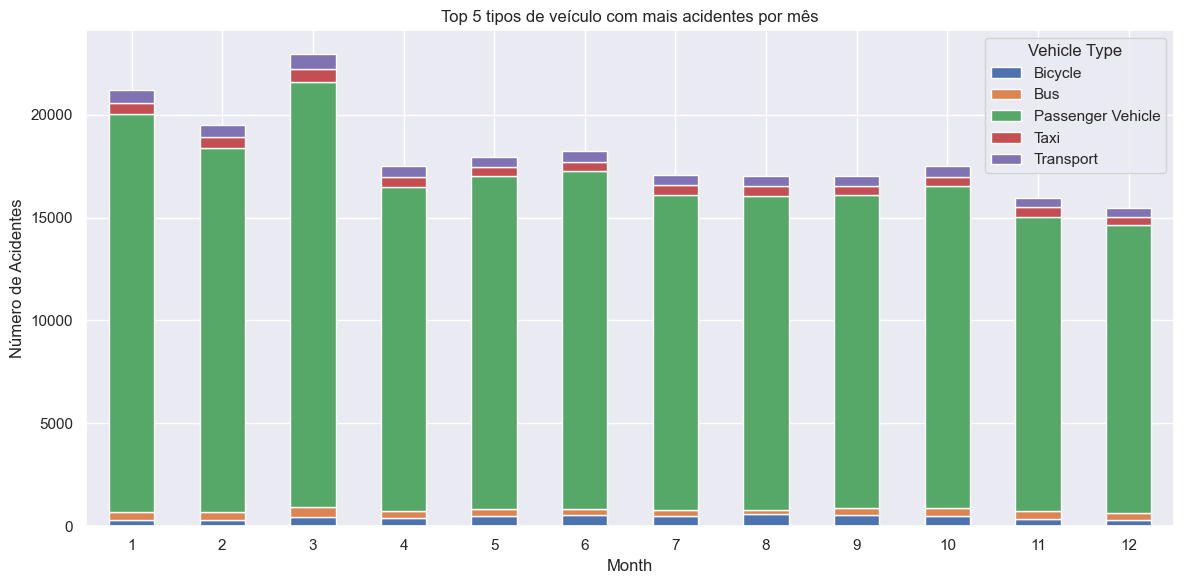

In [49]:
# Agrupar e contar o total de acidentes por tipo de veículo
top_5_types = df['Vehicle Type'].value_counts().nlargest(5).index

# Filtrar o DataFrame original para conter apenas os top 5 tipos de veículos
filtered_df = df[df['Vehicle Type'].isin(top_5_types)]

# Agrupar por Mês e Tipo de Veículo (apenas os top 5), e gerar tabela
month_x_type = filtered_df.groupby(['Month', 'Vehicle Type']).size().unstack().fillna(0)

# Plotar gráfico de barras empilhadas
month_x_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 5 tipos de veículo com mais acidentes por mês')
plt.xlabel('Month')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig(dpi=300,
            bbox_inches='tight',
            fname="../visualizations/exploratory/top5_veiculos_acid_mes.png")

plt.show()


Analisando a distribuição de acidentes por tipo de veículo em cada mês do ano, podemos identificar padrões sazonais interessantes que revelam quando diferentes veículos estão mais propensos a se envolver em acidentes.

Veículos de Passageiros: Dominam amplamente as estatísticas em todos os meses, com pico em março (20.677 acidentes). O primeiro trimestre do ano apresenta números significativamente mais altos, especialmente janeiro e março. Há uma redução notável a partir de abril, que se mantém mais estável durante o resto do ano.

Bicicletas: Mostram um padrão sazonal claro - os números mais baixos ocorrem nos meses de inverno (fevereiro: 289, dezembro: 298), enquanto os meses mais quentes registram quase o dobro de acidentes, com pico em agosto (573). Isto reflete o aumento natural de ciclistas nas ruas durante a primavera e o verão.

Ônibus: Apresentam tendência oposta às bicicletas, com mais acidentes nos meses frios (março: 476, janeiro: 411) e uma queda significativa no verão, atingindo o mínimo em agosto (198). Isto pode estar relacionado às férias escolares e redução no número de rotas ou frequência.

Táxis: Mantêm uma distribuição mais estável ao longo do ano, com pequena concentração nos primeiros meses, especialmente março (632). A flutuação é menor comparada a outros tipos de veículos, sugerindo que sua exposição ao risco permanece mais constante.

Transportes: Seguem padrão similar aos ônibus, com pico em março (706) e valores mais baixos nos meses finais do ano (dezembro: 439). Esta categoria provavelmente inclui veículos comerciais e de entrega.

Esta análise sazonal oferece insights valiosos para campanhas de segurança viária direcionadas, sugerindo quando diferentes tipos de usuários das vias precisam de atenção especial. Por exemplo, campanhas para ciclistas seriam mais eficazes no início da primavera, enquanto ações focadas em veículos de passageiros deveriam intensificar-se nos primeiros meses do ano.
